 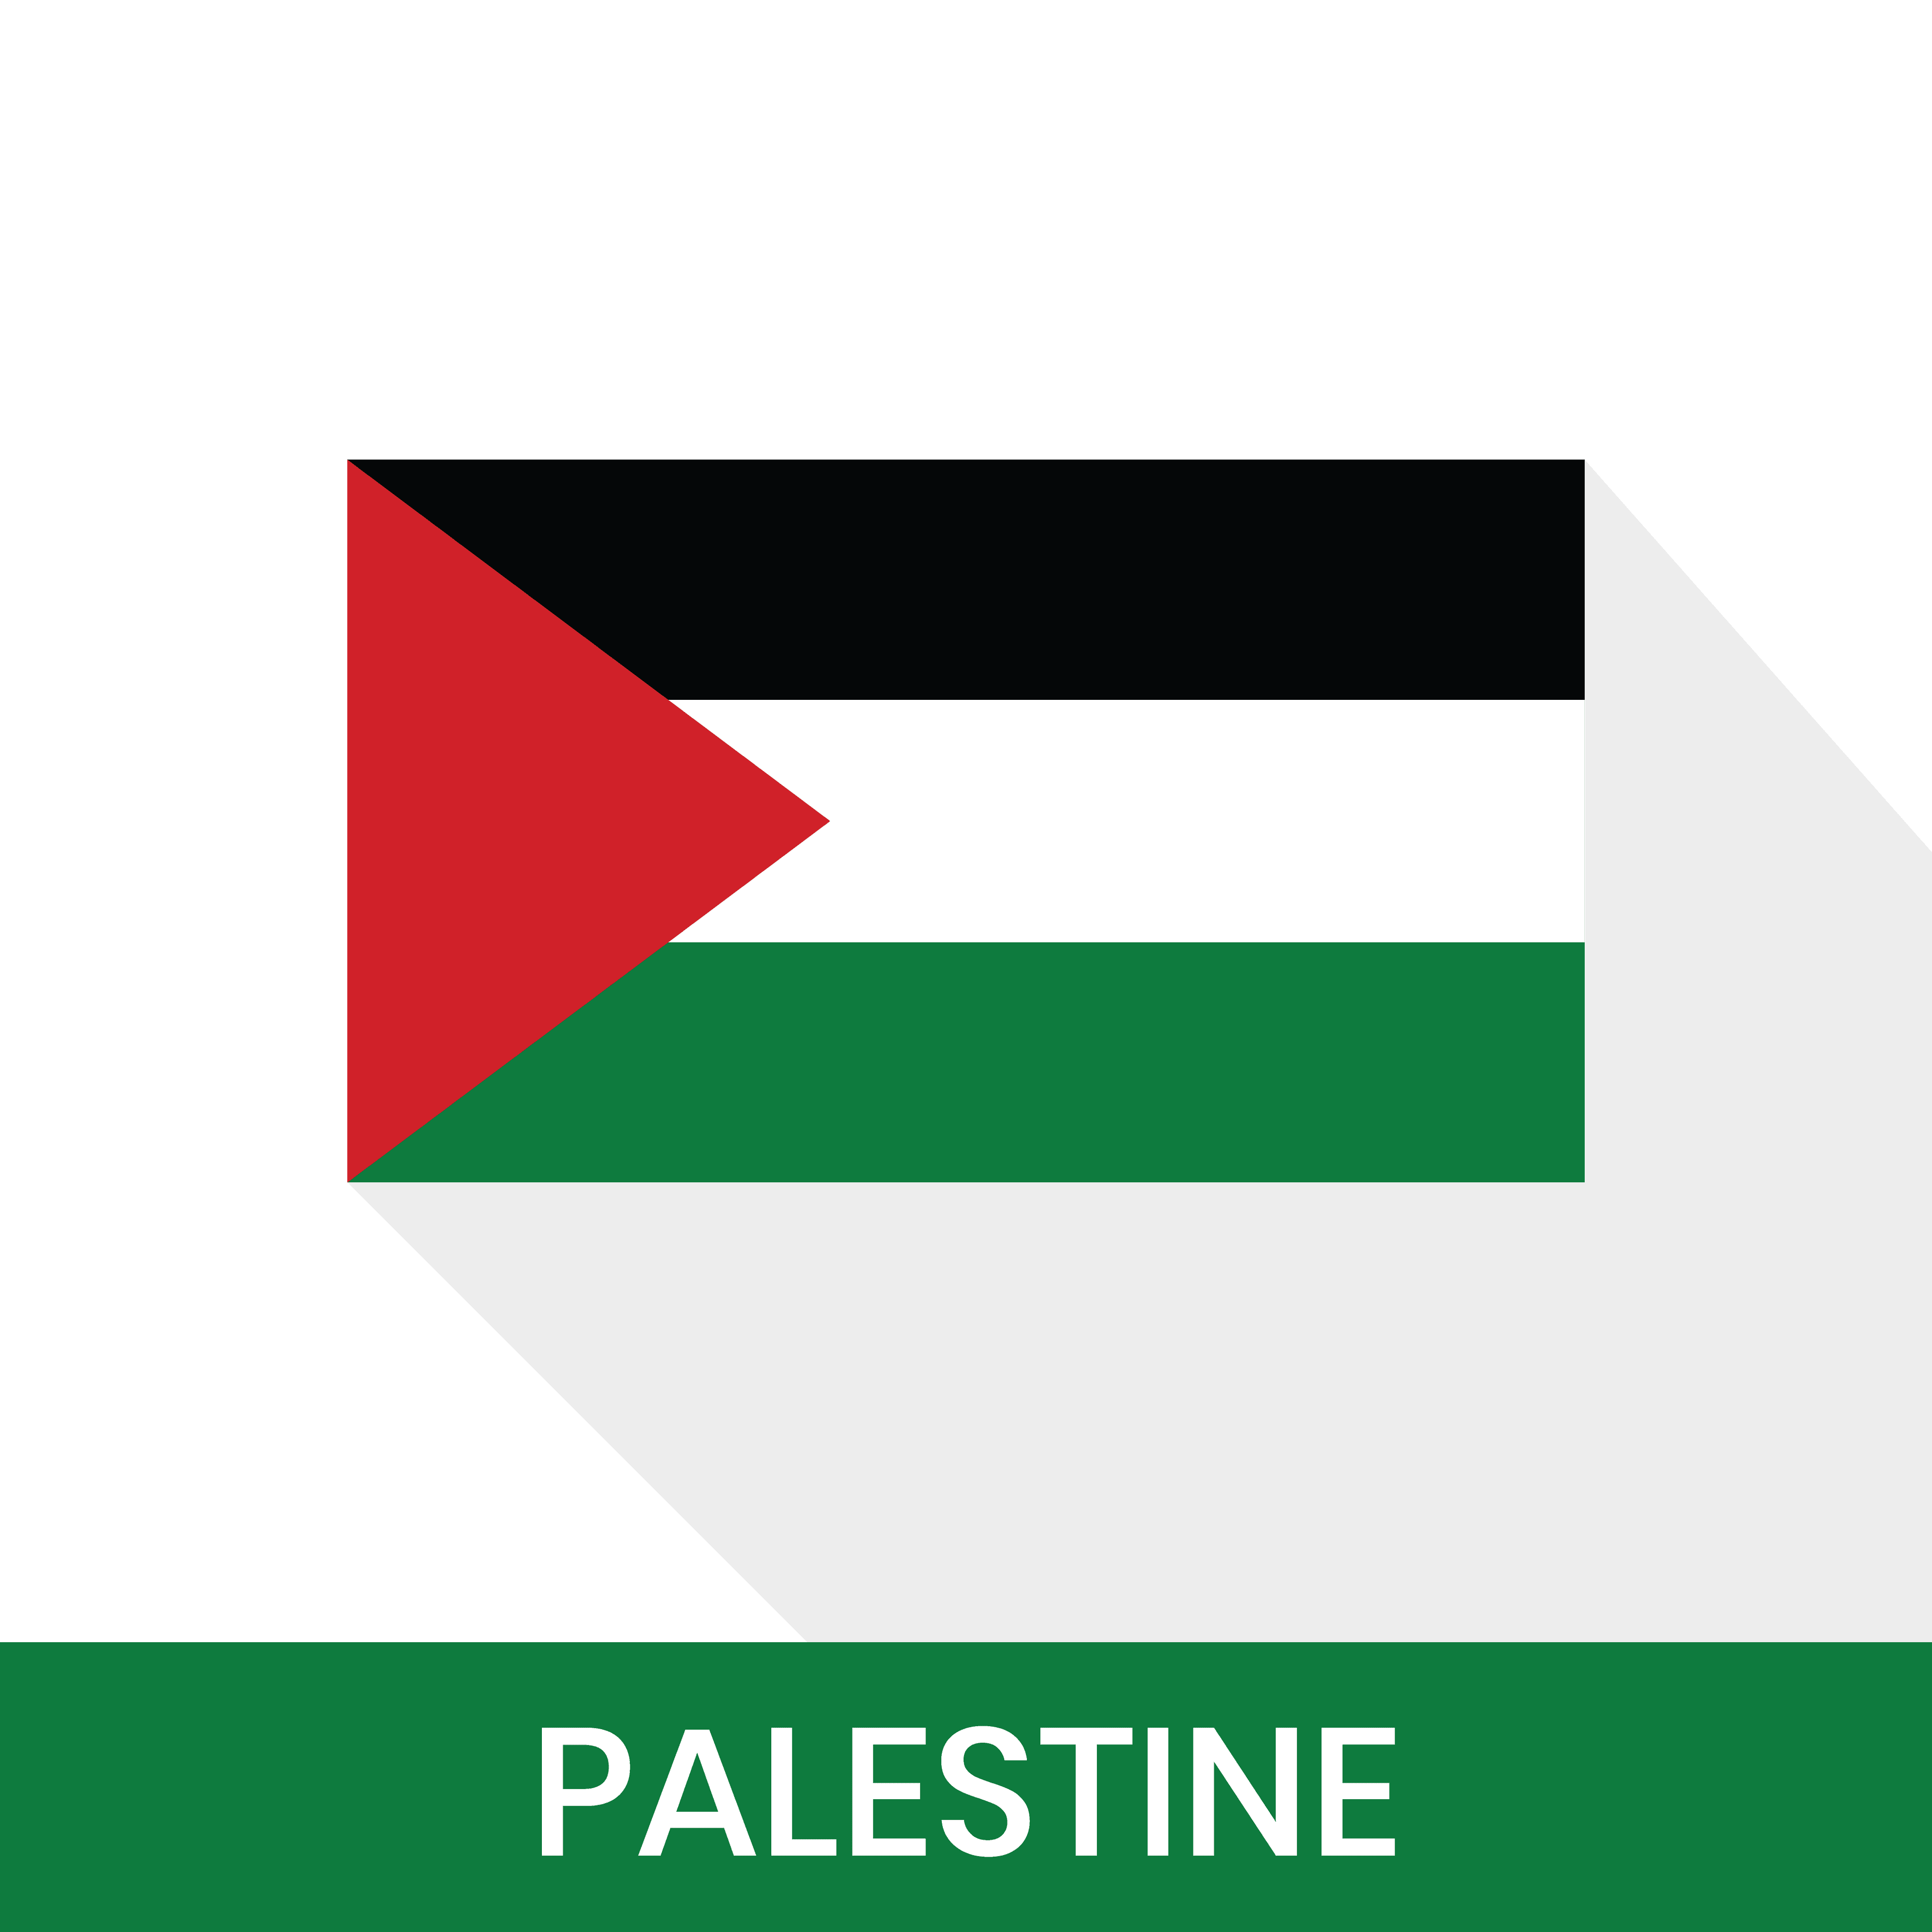

# Unemployement Analyisis

In [1]:
# Load Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import scipy.stats as stats
import plotly.express as px

## EDA

In [2]:
# Loading Dataset
data = pd.read_csv("Unemployment in India.csv")
data.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


### Understand of Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [4]:
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [5]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

### Data Cleanning and Visulazition

In [6]:
data.columns = data.columns.str.strip()

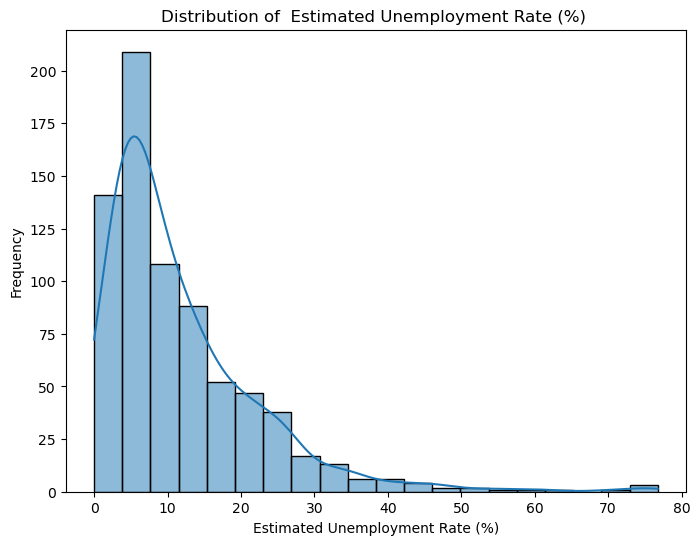

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.xlabel('Estimated Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of  Estimated Unemployment Rate (%) ')
plt.show()

###  Inspecting the distribution of Estimated Labour Participation Rate (%) by using histogram

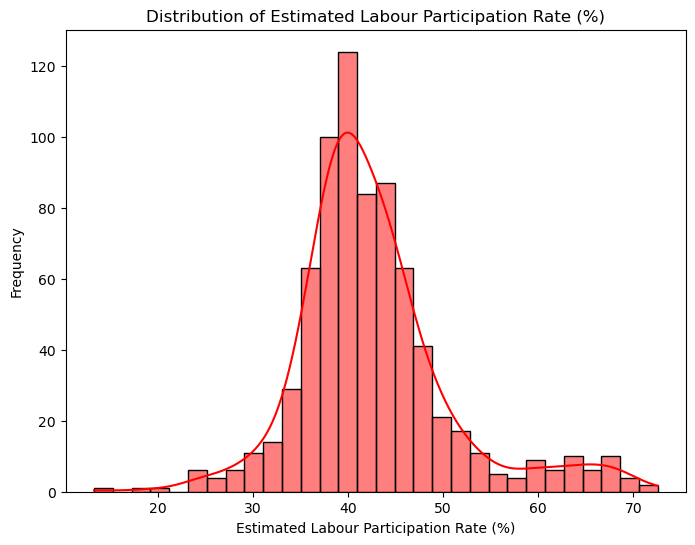

In [8]:
plt.figure(figsize=(8,6))
sns.histplot(data['Estimated Labour Participation Rate (%)'],kde=True,bins=30,color='red')
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Labour Participation Rate (%)')
plt.show()

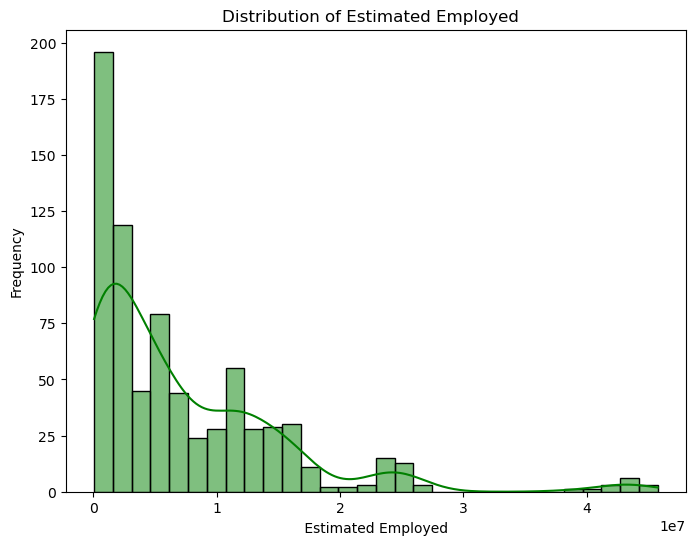

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(data['Estimated Employed'],kde=True,bins=30,color='green')
plt.xlabel(' Estimated Employed ')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Employed  ')
plt.show()

(0.0, 30.0)

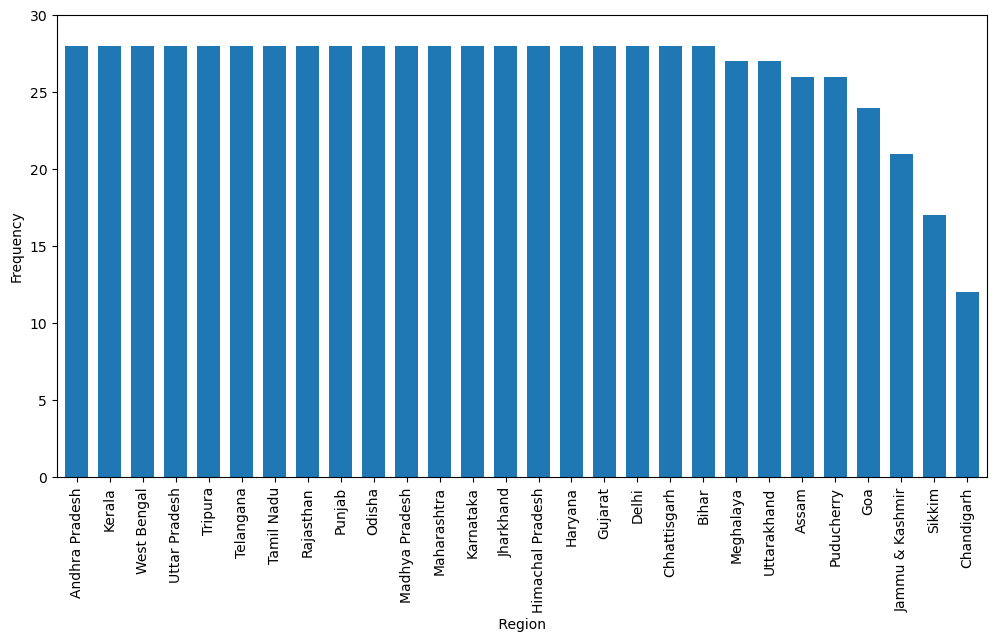

In [10]:
plt.figure(figsize=(12,6))
sns.color_palette("hls", 8)

data['Region'].value_counts().plot(kind='bar',width=0.7)
plt.xlabel(' Region ')
plt.ylabel('Frequency')
plt.ylim(0,30)

([<matplotlib.patches.Wedge at 0x27deebb9b50>,
 [Text(-0.051350606033972866, 1.0988007623131428, 'Urban'),
  Text(0.051350606033972734, -1.0988007623131428, 'Rural')],
 [Text(-0.02800942147307611, 0.5993458703526233, '51%'),
  Text(0.028009421473076033, -0.5993458703526233, '49%')])

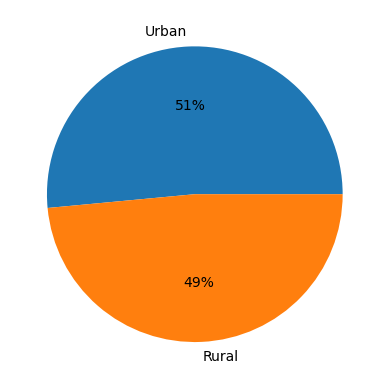

In [11]:

area = data['Area'].value_counts()
plt.pie(area,labels=area.keys(),autopct='%.0f%%')

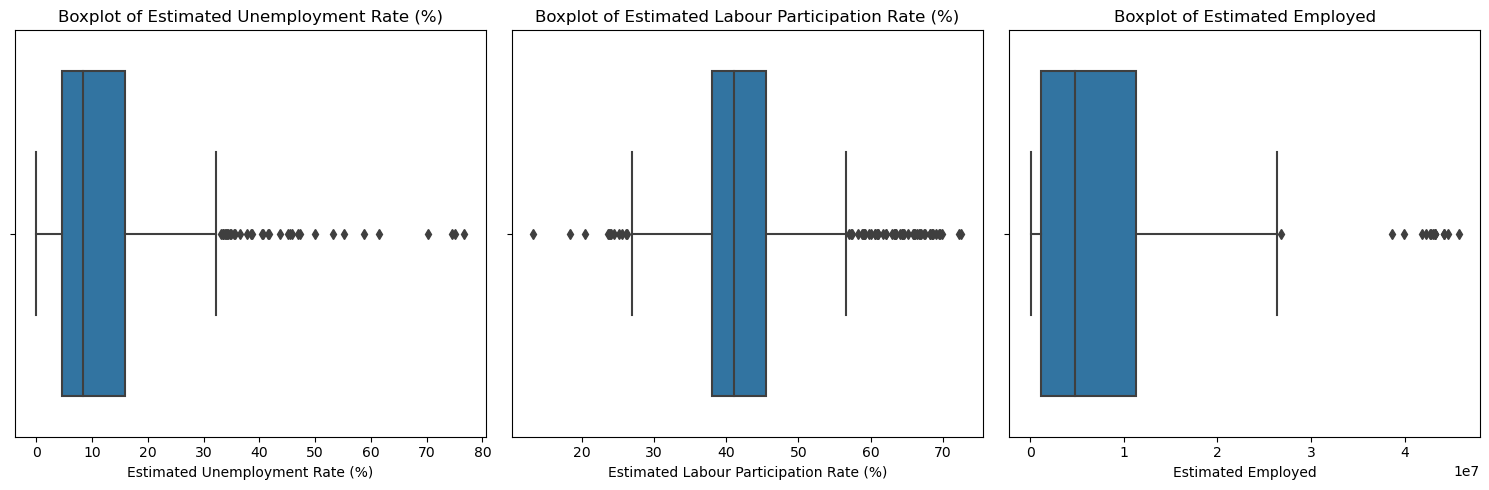

In [12]:
# Create a figure with subplots for each column
fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.boxplot(x=data['Estimated Unemployment Rate (%)'], ax=axes[0])
axes[0].set_xlabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Boxplot of Estimated Unemployment Rate (%)')


sns.boxplot(x=data['Estimated Labour Participation Rate (%)'], ax=axes[1])
axes[1].set_xlabel('Estimated Labour Participation Rate (%)')
axes[1].set_title('Boxplot of Estimated Labour Participation Rate (%)')


sns.boxplot(x=data['Estimated Employed'], ax=axes[2])
axes[2].set_xlabel('Estimated Employed')
axes[2].set_title('Boxplot of Estimated Employed')

plt.tight_layout()
plt.show()

### Removing outlier using interquartile range method

In [13]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers from Column1
data['Estimated Unemployment Rate (%)'] = remove_outliers(data['Estimated Unemployment Rate (%)'])

# Remove outliers from Column2
data['Estimated Labour Participation Rate (%)'] = remove_outliers(data['Estimated Labour Participation Rate (%)'])

# Remove outliers from Column3
data['Estimated Employed'] = remove_outliers(data['Estimated Employed'])

### box plot after removing outlier

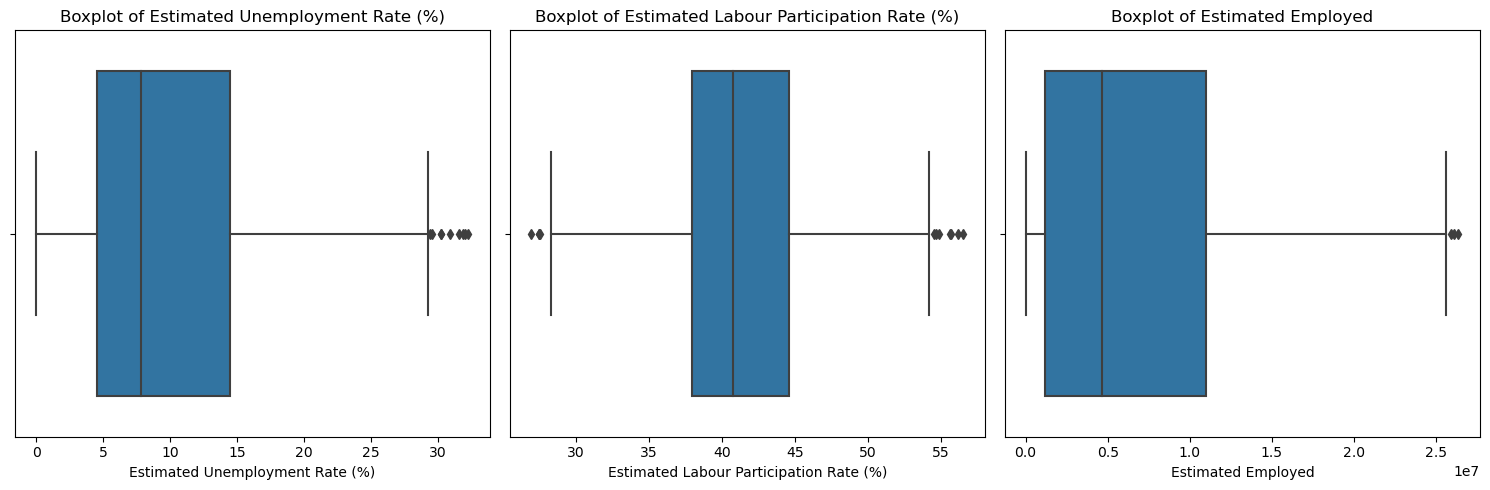

In [14]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))


sns.boxplot(x=data['Estimated Unemployment Rate (%)'], ax=axes[0])
axes[0].set_xlabel('Estimated Unemployment Rate (%)')
axes[0].set_title('Boxplot of Estimated Unemployment Rate (%)')


sns.boxplot(x=data['Estimated Labour Participation Rate (%)'], ax=axes[1])
axes[1].set_xlabel('Estimated Labour Participation Rate (%)')
axes[1].set_title('Boxplot of Estimated Labour Participation Rate (%)')

sns.boxplot(x=data['Estimated Employed'], ax=axes[2])
axes[2].set_xlabel('Estimated Employed')
axes[2].set_title('Boxplot of Estimated Employed')


plt.tight_layout()
plt.show()

<Axes: >

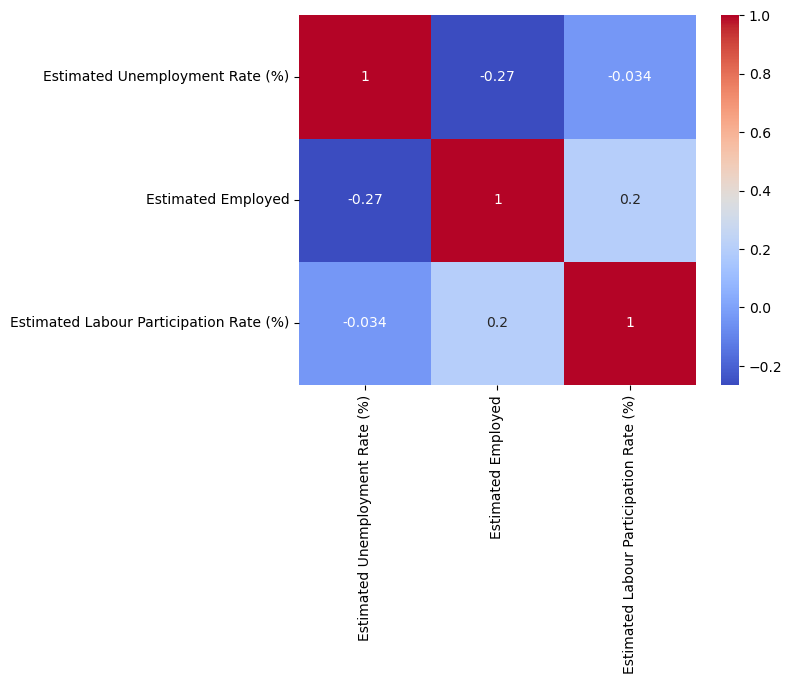

In [15]:
sns.heatmap(data[['Estimated Unemployment Rate (%)',"Estimated Employed","Estimated Labour Participation Rate (%)"]].corr(),annot=True,cmap='coolwarm')

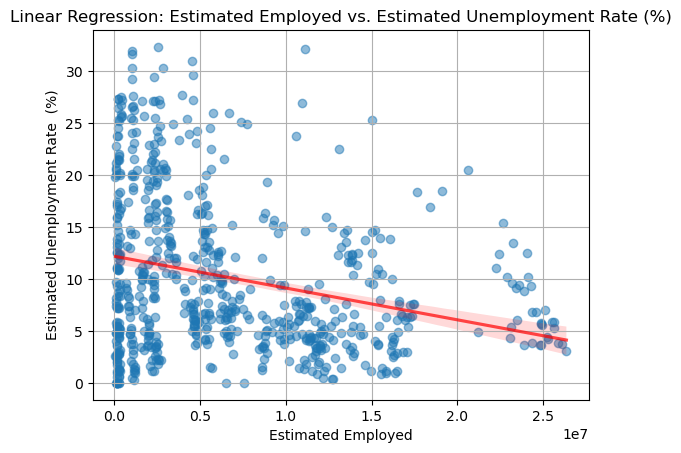

In [16]:
sns.regplot(y='Estimated Unemployment Rate (%)', x='Estimated Employed', data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.ylabel('Estimated Unemployment Rate  (%)')
plt.xlabel('Estimated Employed')
plt.title('Linear Regression: Estimated Employed vs. Estimated Unemployment Rate (%)')
plt.grid(True)

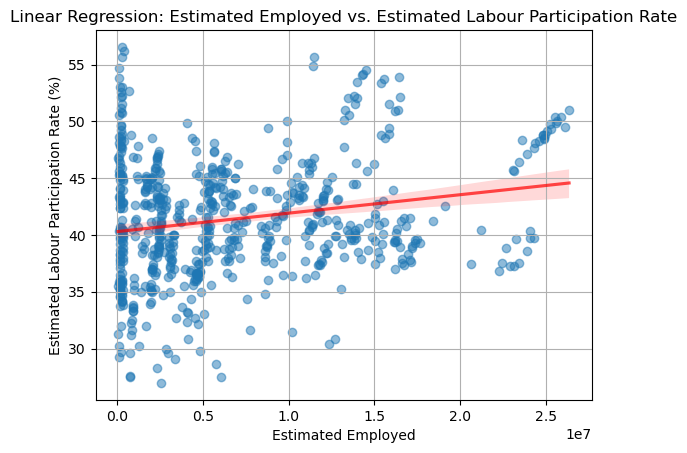

In [17]:
sns.regplot(y='Estimated Labour Participation Rate (%)', x='Estimated Employed', data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.xlabel('Estimated Employed')
plt.ylabel('Estimated Labour Participation Rate (%)')
plt.title('Linear Regression: Estimated Employed vs. Estimated Labour Participation Rate')
plt.grid(True)

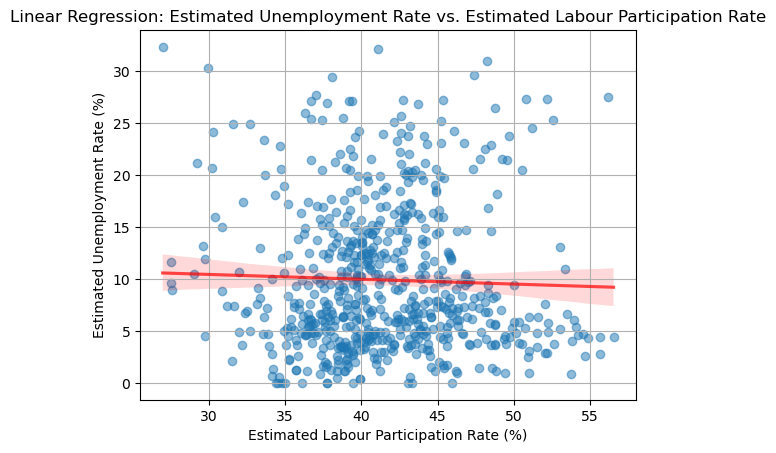

In [18]:
sns.regplot(x='Estimated Labour Participation Rate (%)', y='Estimated Unemployment Rate (%)', data=data,scatter_kws={'alpha': 0.5},line_kws={'alpha': 0.7, 'color': 'red'})
plt.xlabel('Estimated Labour Participation Rate (%)')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Linear Regression: Estimated Unemployment Rate vs. Estimated Labour Participation Rate')
plt.grid(True)

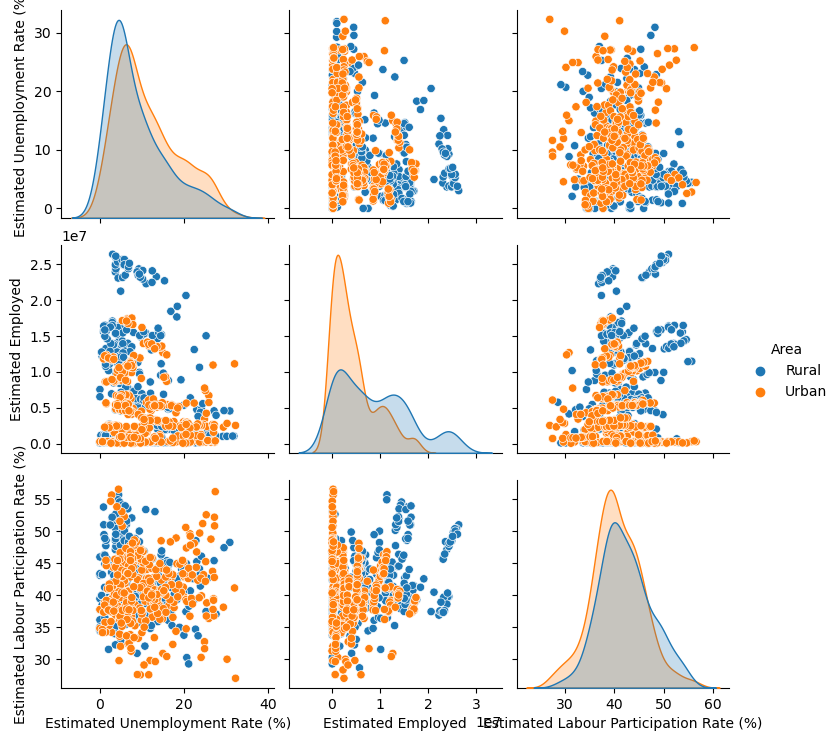

In [19]:
sns.pairplot(data,diag_kind='kde',hue='Area')
plt.xticks(rotation = 180)
plt.show()

In [20]:
 cross = pd.crosstab(data['Region'],data['Area'])

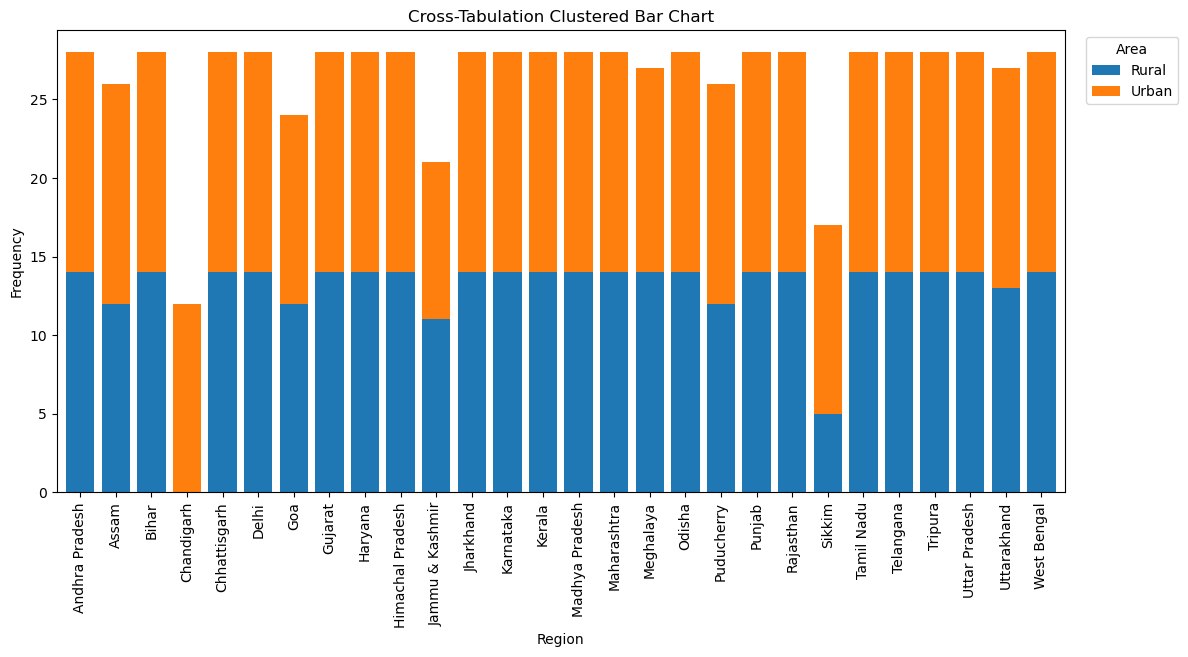

In [21]:
cross.plot(kind='bar', stacked=True, figsize=(13, 6),width=0.8)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Cross-Tabulation Clustered Bar Chart')
plt.legend(title='Area', loc='upper right', bbox_to_anchor=(1.12, 1.0))
plt.show()

In [22]:
#checking the total number of null values in each column of dataframe 
data.isna().sum()

Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            63
Estimated Employed                         43
Estimated Labour Participation Rate (%)    91
Area                                       28
dtype: int64

In [23]:
#Displaying the data with null values 
data[data.isna().any(axis=1)]

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
14,Assam,31-05-2019,Monthly,4.29,11749334.0,NaN,Rural
37,Bihar,30-04-2020,Monthly,NaN,14645275.0,38.63,Rural
38,Bihar,31-05-2020,Monthly,NaN,14050319.0,38.50,Rural
105,Haryana,30-04-2020,Monthly,NaN,4041050.0,49.85,Rural
106,Haryana,31-05-2020,Monthly,NaN,3914193.0,42.78,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# removing rows with null values 
data.dropna(axis=0, how ='all',inplace=True)

In [25]:
#After removing the rows with null values 
data.isna().sum()

Region                                      0
Date                                        0
Frequency                                   0
Estimated Unemployment Rate (%)            35
Estimated Employed                         15
Estimated Labour Participation Rate (%)    63
Area                                        0
dtype: int64

In [26]:
data['Estimated Unemployment Rate (%)'] = data['Estimated Unemployment Rate (%)'].fillna(data['Estimated Unemployment Rate (%)'].mean())
data['Estimated Employed'] = data['Estimated Employed'].fillna(data['Estimated Employed'].mean())
data['Estimated Labour Participation Rate (%)'] = data['Estimated Labour Participation Rate (%)'].fillna(data['Estimated Labour Participation Rate (%)'].mean())

In [27]:
data.isna().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [28]:
data['Frequency'].value_counts()

Monthly     381
 Monthly    359
Name: Frequency, dtype: int64

In [29]:
data['Frequency']=data['Frequency'].str.strip()

In [30]:
data['Frequency'].value_counts()

Monthly    740
Name: Frequency, dtype: int64

In [31]:
mean_region = data.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
print(mean_region)

Region
Andhra Pradesh       7.477143
Assam                6.428077
Bihar               13.616809
Chandigarh          15.991667
Chhattisgarh         9.240357
Delhi               15.222416
Goa                  9.274167
Gujarat              6.663929
Haryana             21.066725
Himachal Pradesh    17.116702
Jammu & Kashmir     16.188571
Jharkhand           13.873594
Karnataka            5.853488
Kerala              10.123929
Madhya Pradesh       6.322416
Maharashtra          7.557500
Meghalaya            4.798889
Odisha               5.657857
Puducherry           2.682807
Punjab              10.943488
Rajasthan           13.151345
Sikkim               7.249412
Tamil Nadu           5.460821
Telangana            5.941261
Tripura             21.176831
Uttar Pradesh       12.551429
Uttarakhand          6.582963
West Bengal          8.124643
Name: Estimated Unemployment Rate (%), dtype: float64


Text(0.5, 1.0, 'Average unemployment rate based on the region of india')

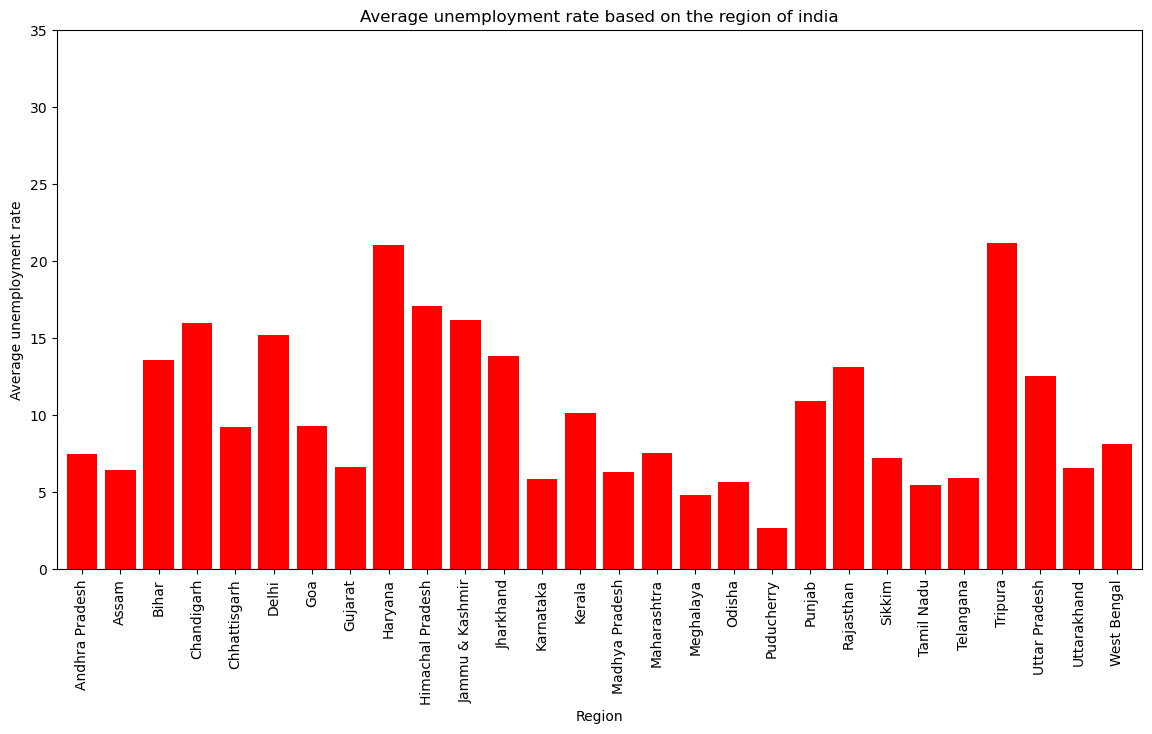

In [32]:
plt.figure(figsize=(14,7))
mean_region.plot(kind='bar',color='red',width=0.8)
plt.ylim(0,35)
plt.xlabel('Region')
plt.ylabel('Average unemployment rate')
plt.title('Average unemployment rate based on the region of india')

In [33]:
mean_area = data.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
print(mean_area)

Area
Rural     8.997541
Urban    11.211944
Name: Estimated Unemployment Rate (%), dtype: float64


(0.0, 15.0)

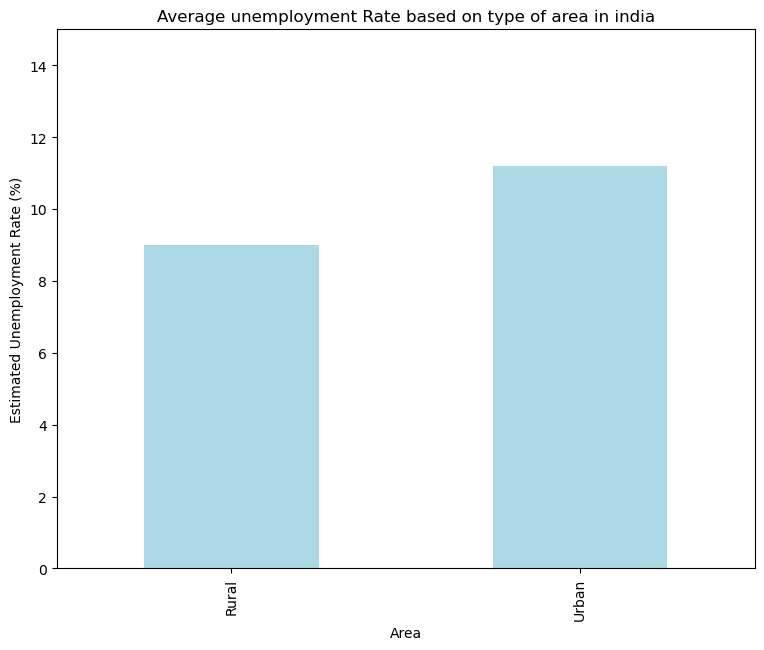

In [34]:
plt.figure(figsize=(9,7))
mean_area.plot(kind="bar",color='lightblue')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Average unemployment Rate based on type of area in india')
plt.ylim(0,15)

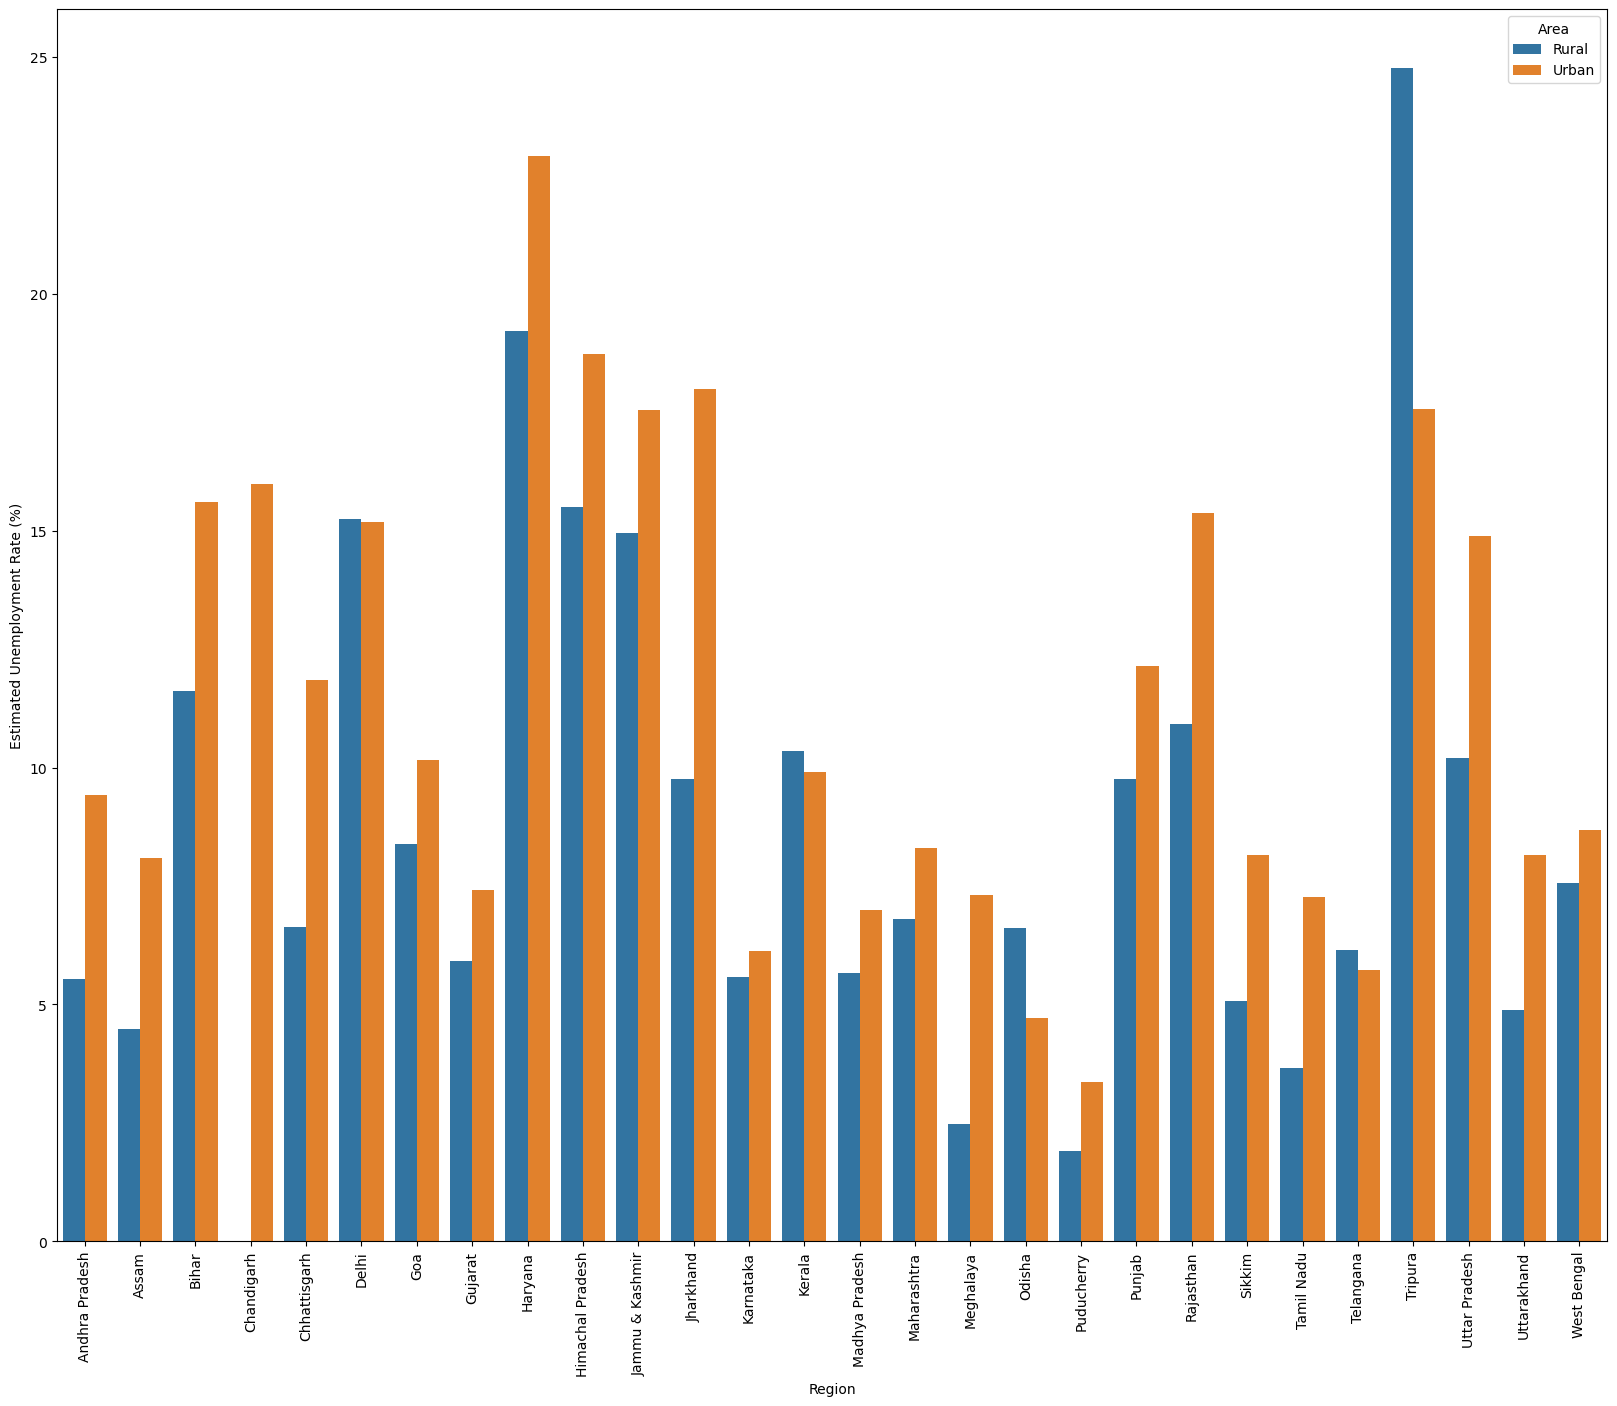

In [35]:
average = data.groupby(['Region', 'Area'])['Estimated Unemployment Rate (%)'].mean().reset_index()
plt.figure(figsize=(20, 16))
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', hue='Area', data=average)
plt.xticks(rotation=90)
plt.show()

# Hypothesis testing

In [36]:
area_rural = data[data['Area'] == 'Rural']
area_urban = data[data['Area'] == 'Urban']

# Assuming you want to compare the unemployment rates
unemployment_r = area_rural['Estimated Unemployment Rate (%)']
unemployment_u = area_urban['Estimated Unemployment Rate (%)']

test = stats.ttest_ind(unemployment_r,unemployment_u)
print(test)

Ttest_indResult(statistic=-4.212089658399191, pvalue=2.8430889499597866e-05)
